In [19]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os

from functools import reduce

In [40]:
import visualize
from importlib import reload

reload(visualize)

<module 'visualize' from '/home/ari/Documents/RLDonkeyCar/analysis/visualize.py'>

Run 1, Episodes: 109, Time: 69 minutes
Run 2, Episodes: 86, Time: 58 minutes
Run 3, Episodes: 51, Time: 34 minutes
Run 4, Episodes: 56, Time: 39 minutes
Run 5, Episodes: 68, Time: 40 minutes
Run 6, Episodes: 56, Time: 39 minutes
Run 7, Episodes: 67, Time: 44 minutes


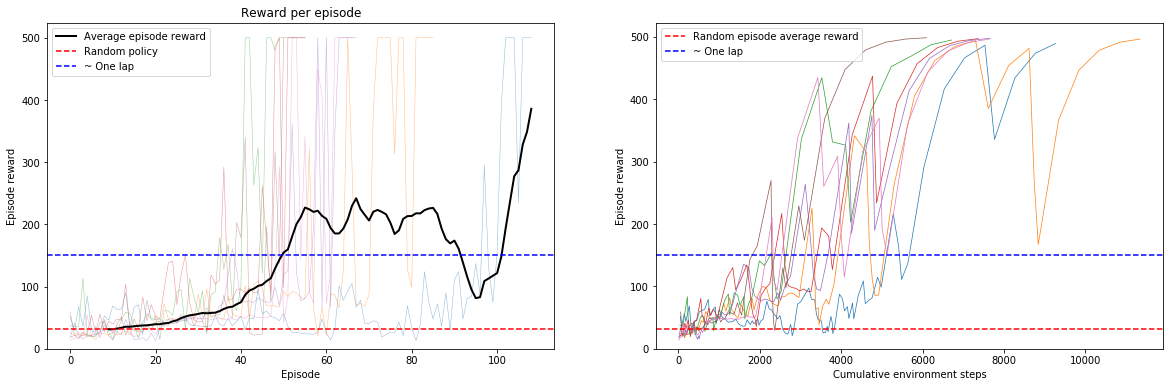

In [41]:
visualize.visualize_run("../records/real_not_pretrained_critic_encoder_update_fixed/", real_car=True)

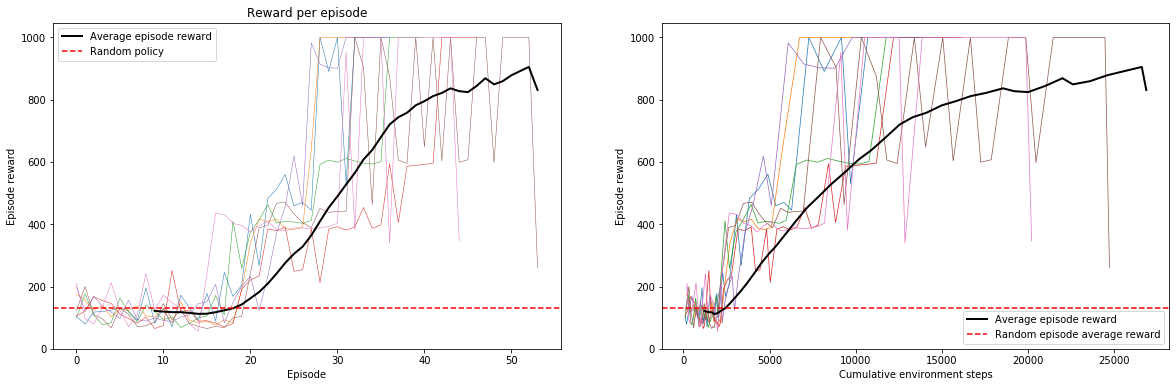

In [22]:
visualize.visualize_run("../records/sim_not_pretrained_critic_encoder_update_fixed/")

In [16]:
folder = "../records/real_not_pretrained_critic_encoder_update_fixed/"

frames = [pd.read_csv(folder + x, sep=";") for x in os.listdir(folder)]
frames = [f for f in frames if len(f) > 0]
rewards = [f["Reward"] for f in frames if len(f) > 0]

In [123]:
(frames[2].Reward.sum() + 450) * 0.1 / 60

11.938333333333334

In [125]:
(frames[0].Reward.sum() + 1000)

10268

In [118]:
50 * 600

30000

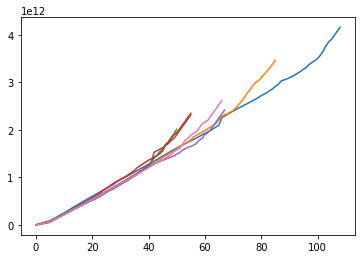

In [111]:
for f in frames:
    time = pd.to_datetime(f.Time)
    plt.plot(time - time[0])

In [ ]:
frames[0].Time.astype

In [96]:
rewards = [f["Reward"] for f in frames if len(f) > 0]
reduced = reduce(lambda x, y: x.add(y, fill_value = 500), rewards)

data = pd.concat(frames)
total = data.groupby("Episode").mean().reset_index()
random_mean = total[total["Episode"] < 5].mean()["Reward"]

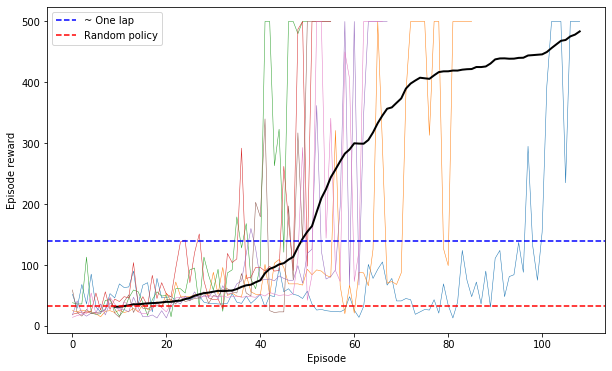

In [101]:
plt.figure(1, (10, 6))
for f in frames:
    plt.plot(f["Reward"], linewidth=0.5)

plt.plot((reduced / 7).rolling(10).mean(), linewidth=2, color="k")

plt.xlabel("Episode")
plt.ylabel("Episode reward")
plt.axhline(140, linestyle="--", color="b", label="~ One lap")
plt.axhline(random_mean, linestyle="--", color="r", label="Random policy")
plt.legend()

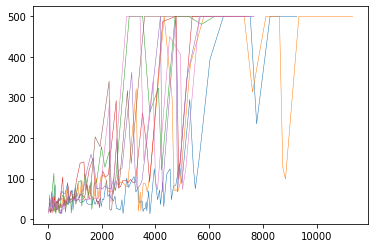

In [27]:
for f in frames:
    plt.plot(f["Reward"].cumsum(), f["Reward"], linewidth=0.5)

#plt.plot((reduced / 7).cumsum(), (reduced / 7).rolling(10).mean(), linewidth=2, color="k")

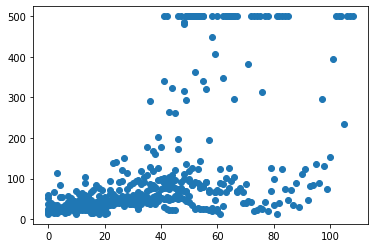

In [34]:
plt.scatter(pd.concat(frames)["Episode"], pd.concat(frames)["Reward"])

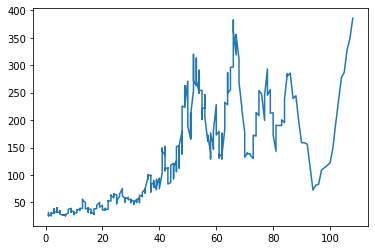

In [42]:
plt.plot(pd.concat(frames)[["Episode", "Reward"]].sort_values("Episode")["Reward"].rolling(10).mean())

In [49]:
steprewards = pd.concat([pd.DataFrame({"step": f["Reward"].cumsum(), "reward": f["Reward"]}) for f in frames]).sort_values("step")

In [ ]:
steprewards = pd.concat([pd.DataFrame({"step": f["Reward"].cumsum(), "reward": f["Reward"]}) for f in frames]).sort_values("step")

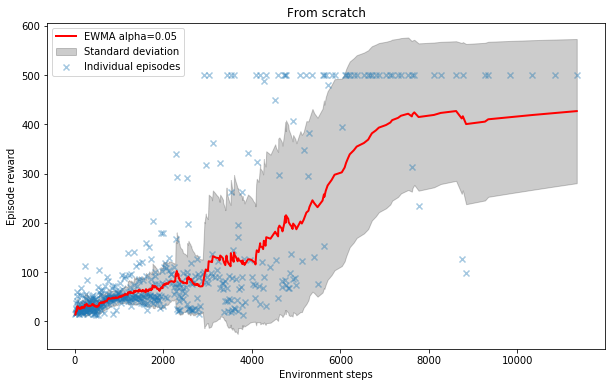

In [131]:
folder = "../records/real_not_pretrained_critic_encoder_update_fixed/"

frames = [pd.read_csv(folder + x, sep=";") for x in os.listdir(folder)]
frames = [f for f in frames if len(f) > 0]
rewards = [f["Reward"] for f in frames if len(f) > 0]

steprewards = pd.concat([pd.DataFrame({"step": f["Reward"].cumsum(), "reward": f["Reward"]}) for f in frames]).sort_values("step")

alpha = 0.05

ewm = steprewards["reward"].ewm(alpha=alpha).mean()
std = steprewards["reward"].ewm(alpha=alpha).std()

plt.figure(1, (10, 6))
plt.title("From scratch")
plt.fill_between(steprewards["step"], ewm - std, ewm + std, alpha=0.2, color="k", label="Standard deviation")
plt.scatter(steprewards["step"], steprewards["reward"], marker="x", alpha=0.4, label="Individual episodes")
plt.plot(steprewards["step"], ewm, label="EWMA alpha=0.05", linewidth=2, color="red")
plt.xlabel("Environment steps")
plt.ylabel("Episode reward")
plt.legend()

plt.show()

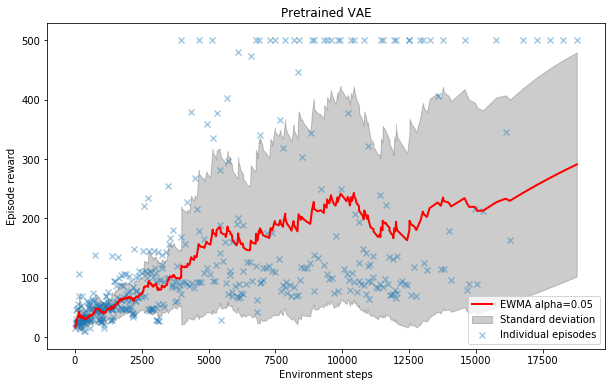

In [133]:
folder = "../records/real_pretrained_1/"

frames = [pd.read_csv(folder + x, sep=";") for x in os.listdir(folder)]
frames = [f for f in frames if len(f) > 0]
rewards = [f["Reward"] for f in frames if len(f) > 0]

steprewards = pd.concat([pd.DataFrame({"step": f["Reward"].cumsum(), "reward": f["Reward"]}) for f in frames]).sort_values("step")

alpha = 0.05

ewm = steprewards["reward"].ewm(alpha=alpha).mean()
std = steprewards["reward"].ewm(alpha=alpha).std()

plt.figure(1, (10, 6))
plt.title("Pretrained VAE")
plt.fill_between(steprewards["step"], ewm - std, ewm + std, alpha=0.2, color="k", label="Standard deviation")
plt.scatter(steprewards["step"], steprewards["reward"], marker="x", alpha=0.4, label="Individual episodes")
plt.plot(steprewards["step"], ewm, label="EWMA alpha=0.05", linewidth=2, color="red")
plt.xlabel("Environment steps")
plt.ylabel("Episode reward")
plt.legend()

plt.show()

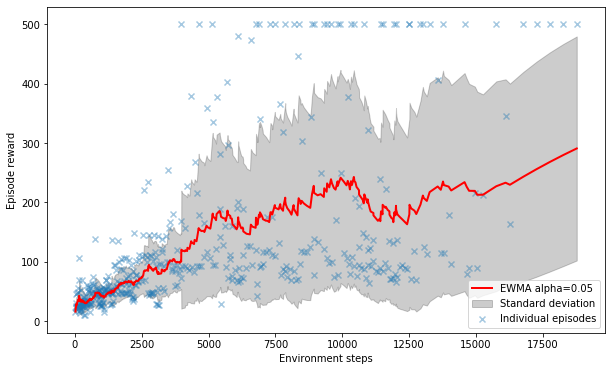

In [129]:
folder = "../records/real_pretrained_1/"
emw_plot(folder)

In [93]:
steprewards["reward"].ewm(alpha=0.05).std()

0            NaN
0       2.828427
0       2.620956
0       4.574451
1       4.042984
         ...    
81    157.345814
82    154.637468
83    151.893796
84    149.124713
85    146.339018
Name: reward, Length: 493, dtype: float64

In [45]:
frames[1]["Reward"]

0      25
1      23
2      26
3      24
4      23
     ... 
81    500
82    500
83    500
84    500
85    500
Name: Reward, Length: 86, dtype: int64

In [44]:
_.ffill?

Signature: _.ffill(axis=None, inplace: bool = False, limit=None, downcast=None) -> Union[~FrameOrSeries, NoneType]
Docstring:
Synonym for :meth:`DataFrame.fillna` with ``method='ffill'``.

Returns
-------
%(klass)s or None
    Object with missing values filled or None if ``inplace=True``.
File:      ~/anaconda3/envs/donkey/lib/python3.7/site-packages/pandas/core/generic.py
Type:      method


In [50]:

frames[1]["Reward"]

0      25
1      23
2      26
3      24
4      23
     ... 
81    500
82    500
83    500
84    500
85    500
Name: Reward, Length: 86, dtype: int64

In [51]:
frames[1]

,Episode,Reward,Time
0,0,25,2020-07-15T13:11:33.308908
1,1,23,2020-07-15T13:11:48.543962
2,2,26,2020-07-15T13:12:00.999915
3,3,24,2020-07-15T13:12:13.736340
4,4,23,2020-07-15T13:12:25.563758
...,...,...,...
81,81,500,2020-07-15T14:04:22.325842
82,82,500,2020-07-15T14:05:30.900306
83,83,500,2020-07-15T14:06:39.684163
84,84,500,2020-07-15T14:07:57.313086


In [ ]:
_.

In [57]:
frames[1]["Reward"]

0      25
1      23
2      26
3      24
4      23
     ... 
81    500
82    500
83    500
84    500
85    500
Name: Reward, Length: 86, dtype: int64

In [77]:
f.Reward.append(pd.Series(np.ones(107 - len(frames[1])) * 500)).reset_index()

,index,0
0,0,14.0
1,1,17.0
2,2,19.0
3,3,22.0
4,4,54.0
...,...,...
83,16,500.0
84,17,500.0
85,18,500.0
86,19,500.0


In [82]:
padded = [pd.Series(np.zeros(109)).add(f.Reward, fill_value=500) for f in frames]

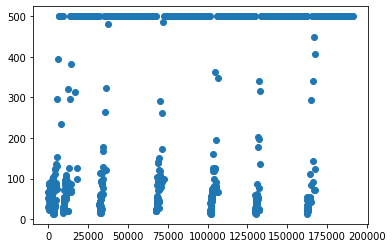

In [115]:
stacked = pd.concat(padded)
plt.scatter(stacked.cumsum(), pd.concat(padded))

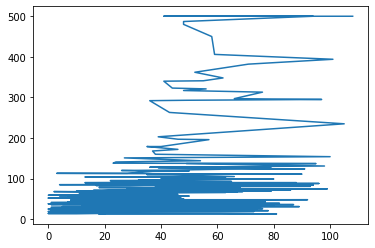

In [86]:
sorted_values = stacked.sort_values() 
plt.plot(sorted_values())